In [1]:

import pandas as pd
from google.colab import files
import io


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded["data-employee-recruitment.csv"]))

Saving data-employee-recruitment.csv to data-employee-recruitment.csv


In [4]:
df.head()

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,14569,0.704,Male,Has relevent experience,Full time course,Graduate,STEM,2,50-99,Pvt Ltd,2,71,1.0
1,10557,0.594,Female,Has relevent experience,Full time course,Masters,STEM,9,50-99,Early Stage Startup,never,217,1.0
2,14095,0.596,Male,Has relevent experience,Part time course,Graduate,Humanities,2,100-500,Pvt Ltd,2,12,1.0
3,16300,0.614,Male,Has relevent experience,Full time course,Masters,STEM,4,50-99,Pvt Ltd,1,20,1.0
4,14550,0.534,Male,No relevent experience,Full time course,Graduate,STEM,<1,50-99,Early Stage Startup,1,52,1.0


In [44]:
print("Missing Value:", df.isnull().any().any())

Missing Value: False


In [5]:
df.shape

(2135, 13)

In [6]:
data = df.copy()  
data.drop(columns=["enrollee_id"], inplace=True)
data.head() 

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.704,Male,Has relevent experience,Full time course,Graduate,STEM,2,50-99,Pvt Ltd,2,71,1.0
1,0.594,Female,Has relevent experience,Full time course,Masters,STEM,9,50-99,Early Stage Startup,never,217,1.0
2,0.596,Male,Has relevent experience,Part time course,Graduate,Humanities,2,100-500,Pvt Ltd,2,12,1.0
3,0.614,Male,Has relevent experience,Full time course,Masters,STEM,4,50-99,Pvt Ltd,1,20,1.0
4,0.534,Male,No relevent experience,Full time course,Graduate,STEM,<1,50-99,Early Stage Startup,1,52,1.0


In [7]:
data = pd.get_dummies(data)
data.head()

,city_development_index,training_hours,target,gender_Female,gender_Male,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Full time course,enrolled_university_Part time course,education_level_Graduate,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,0.704,71,1.0,0,1,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
1,0.594,217,1.0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.596,12,1.0,0,1,1,0,0,1,1,...,0,0,0,1,0,1,0,0,0,0
3,0.614,20,1.0,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.534,52,1.0,0,1,0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0


In [8]:
# Drop the column 'target' because it is the data label
X = data.drop(columns=["target"])
# Assign data label to to variable 'y'
y = data.target

In [9]:
# Load libraries
from sklearn.model_selection import train_test_split, GridSearchCV

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, random_state=1, test_size=0.2)

In [10]:
from imblearn.over_sampling import SMOTE     
smote = SMOTE(random_state=5)                
X_train_oversampling, y_train_oversampling = smote.fit_resample(X_train, y_train)

In [11]:
# Before oversampling
print("Before oversampling: " + str(X_train.shape))
print(np.unique(y_train, return_counts=True))                  # Print number of labels, label '0' dominates '1' 

# After oversampling
print("After oversampling: " + str(X_train_oversampling.shape))
print(np.unique(y_train_oversampling, return_counts=True))

Before oversampling: (1708, 59)
(array([0., 1.]), array([836, 872]))
After oversampling: (1744, 59)
(array([0., 1.]), array([872, 872]))


DECISION TREE

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

params = {"criterion": ["gini", "entropy"],             # Criterion to evaluate the purity.
         "max_depth": [3, 5],                           # Maximum depth of the tree
         "min_samples_split": [4, 8]}                   # Stop splitting condition.

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, cv=5)

In [13]:
# Run the search on oversampled training data samples.
grid_search.fit(X_train_oversampling, y_train_oversampling)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 5],
                         'min_samples_split': [4, 8]})

In [14]:
# Best set of hyper-parameters found after searching
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 8}

In [15]:
# Build a decision tree model pipeline from the best set of hyper-parameters found
model_dt = DecisionTreeClassifier(criterion=grid_search.best_params_['criterion'], max_depth=grid_search.best_params_['max_depth'], min_samples_split=grid_search.best_params_['min_samples_split'])

In [16]:
# Train the decision tree model
model_dt.fit(X_train_oversampling, y_train_oversampling)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=8)

In [17]:
# Calculate some evaluation metrics
from sklearn.metrics import classification_report

# Make prediction on the original test set (after training on the over-sampled training set).
pred_y = model_dt.predict(X_test)

print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

         0.0       0.83      0.82      0.83       199
         1.0       0.84      0.86      0.85       228

    accuracy                           0.84       427
   macro avg       0.84      0.84      0.84       427
weighted avg       0.84      0.84      0.84       427



FEATURE IMPORTANCE

city_development_index                         0.833736
training_hours                                 0.016168
gender_Female                                  0.000000
gender_Male                                    0.000000
relevent_experience_Has relevent experience    0.000000
relevent_experience_No relevent experience     0.000000
enrolled_university_Full time course           0.009457
enrolled_university_Part time course           0.000000
education_level_Graduate                       0.000000
education_level_Masters                        0.000000
education_level_Phd                            0.000000
major_discipline_Arts                          0.000000
major_discipline_Business Degree               0.000000
major_discipline_Humanities                    0.000000
major_discipline_No Major                      0.000000
major_discipline_Other                         0.000000
major_discipline_STEM                          0.000000
experience_1                                   0

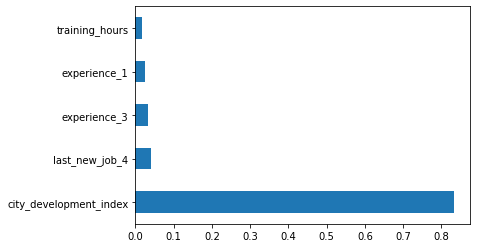

In [43]:
# Print the importance level of each feature
weights = model_dt.feature_importances_     # Feature importance scores.
cols = X.columns                            # Corresponding names of important features.
feature_importances = pd.Series(weights, index=cols)     # Generate Series containing importance level
print(feature_importances)

# Plot the five most important features 
feature_importances.nlargest(5).plot(kind="barh")

In [19]:
# Visualize the tree. 
from sklearn import tree
tree.export_graphviz(decision_tree=model_dt, out_file='classification-tree.dot', feature_names=X.columns)     # Save model as 'classification-tree.dot'
from subprocess import call
call(['dot', '-Tpng', 'classification-tree.dot', '-o', 'classification-tree.png', '-Gdpi=300'])        # Convert the model to an image

0

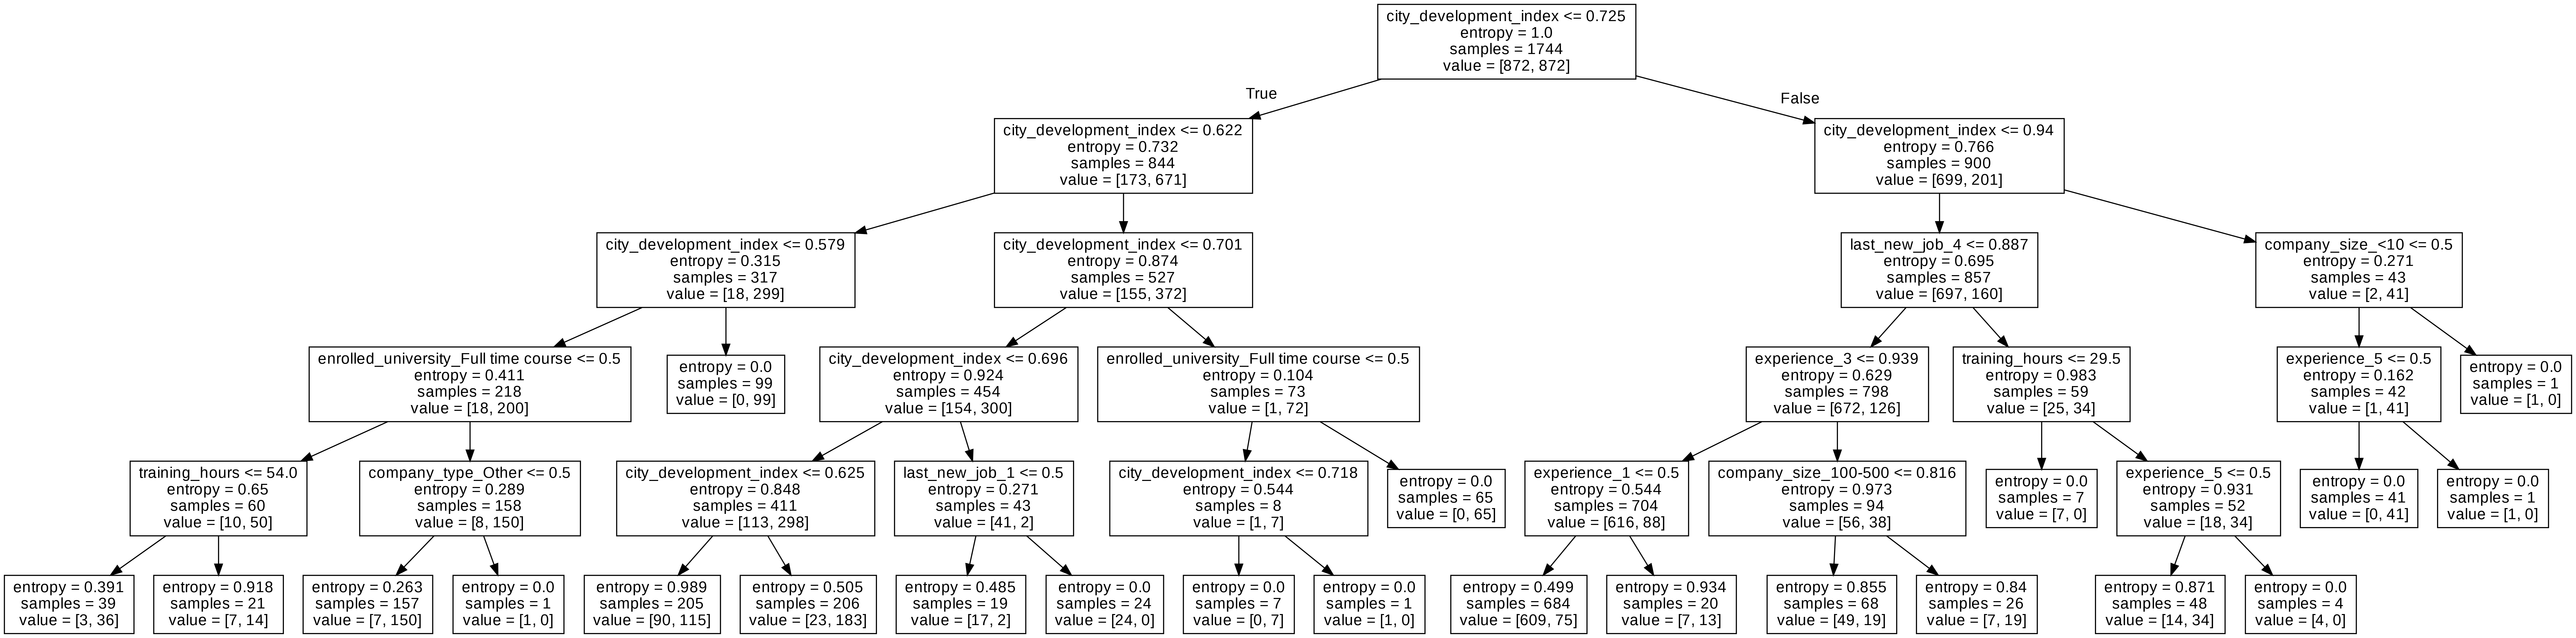

In [20]:
from IPython.display import Image
Image(filename = 'classification-tree.png') 

ENTROPY

In [26]:
# Build a classification tree based on Entropy
from sklearn.tree import DecisionTreeClassifier
model_fi_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=10)
model_fi_entropy.fit(X_train_oversampling, y_train_oversampling)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=10)

In [27]:
# Visualize the tree. Note: 
from sklearn import tree
tree.export_graphviz(decision_tree=model_fi_entropy, out_file='classification-tree-entropy.dot', feature_names=X.columns)     # Save model as 'classification-tree-entropy.dot'
from subprocess import call
call(['dot', '-Tpng', 'classification-tree-entropy.dot', '-o', 'classification-tree-entropy.png', '-Gdpi=300'])        # Convert the model to an image

0

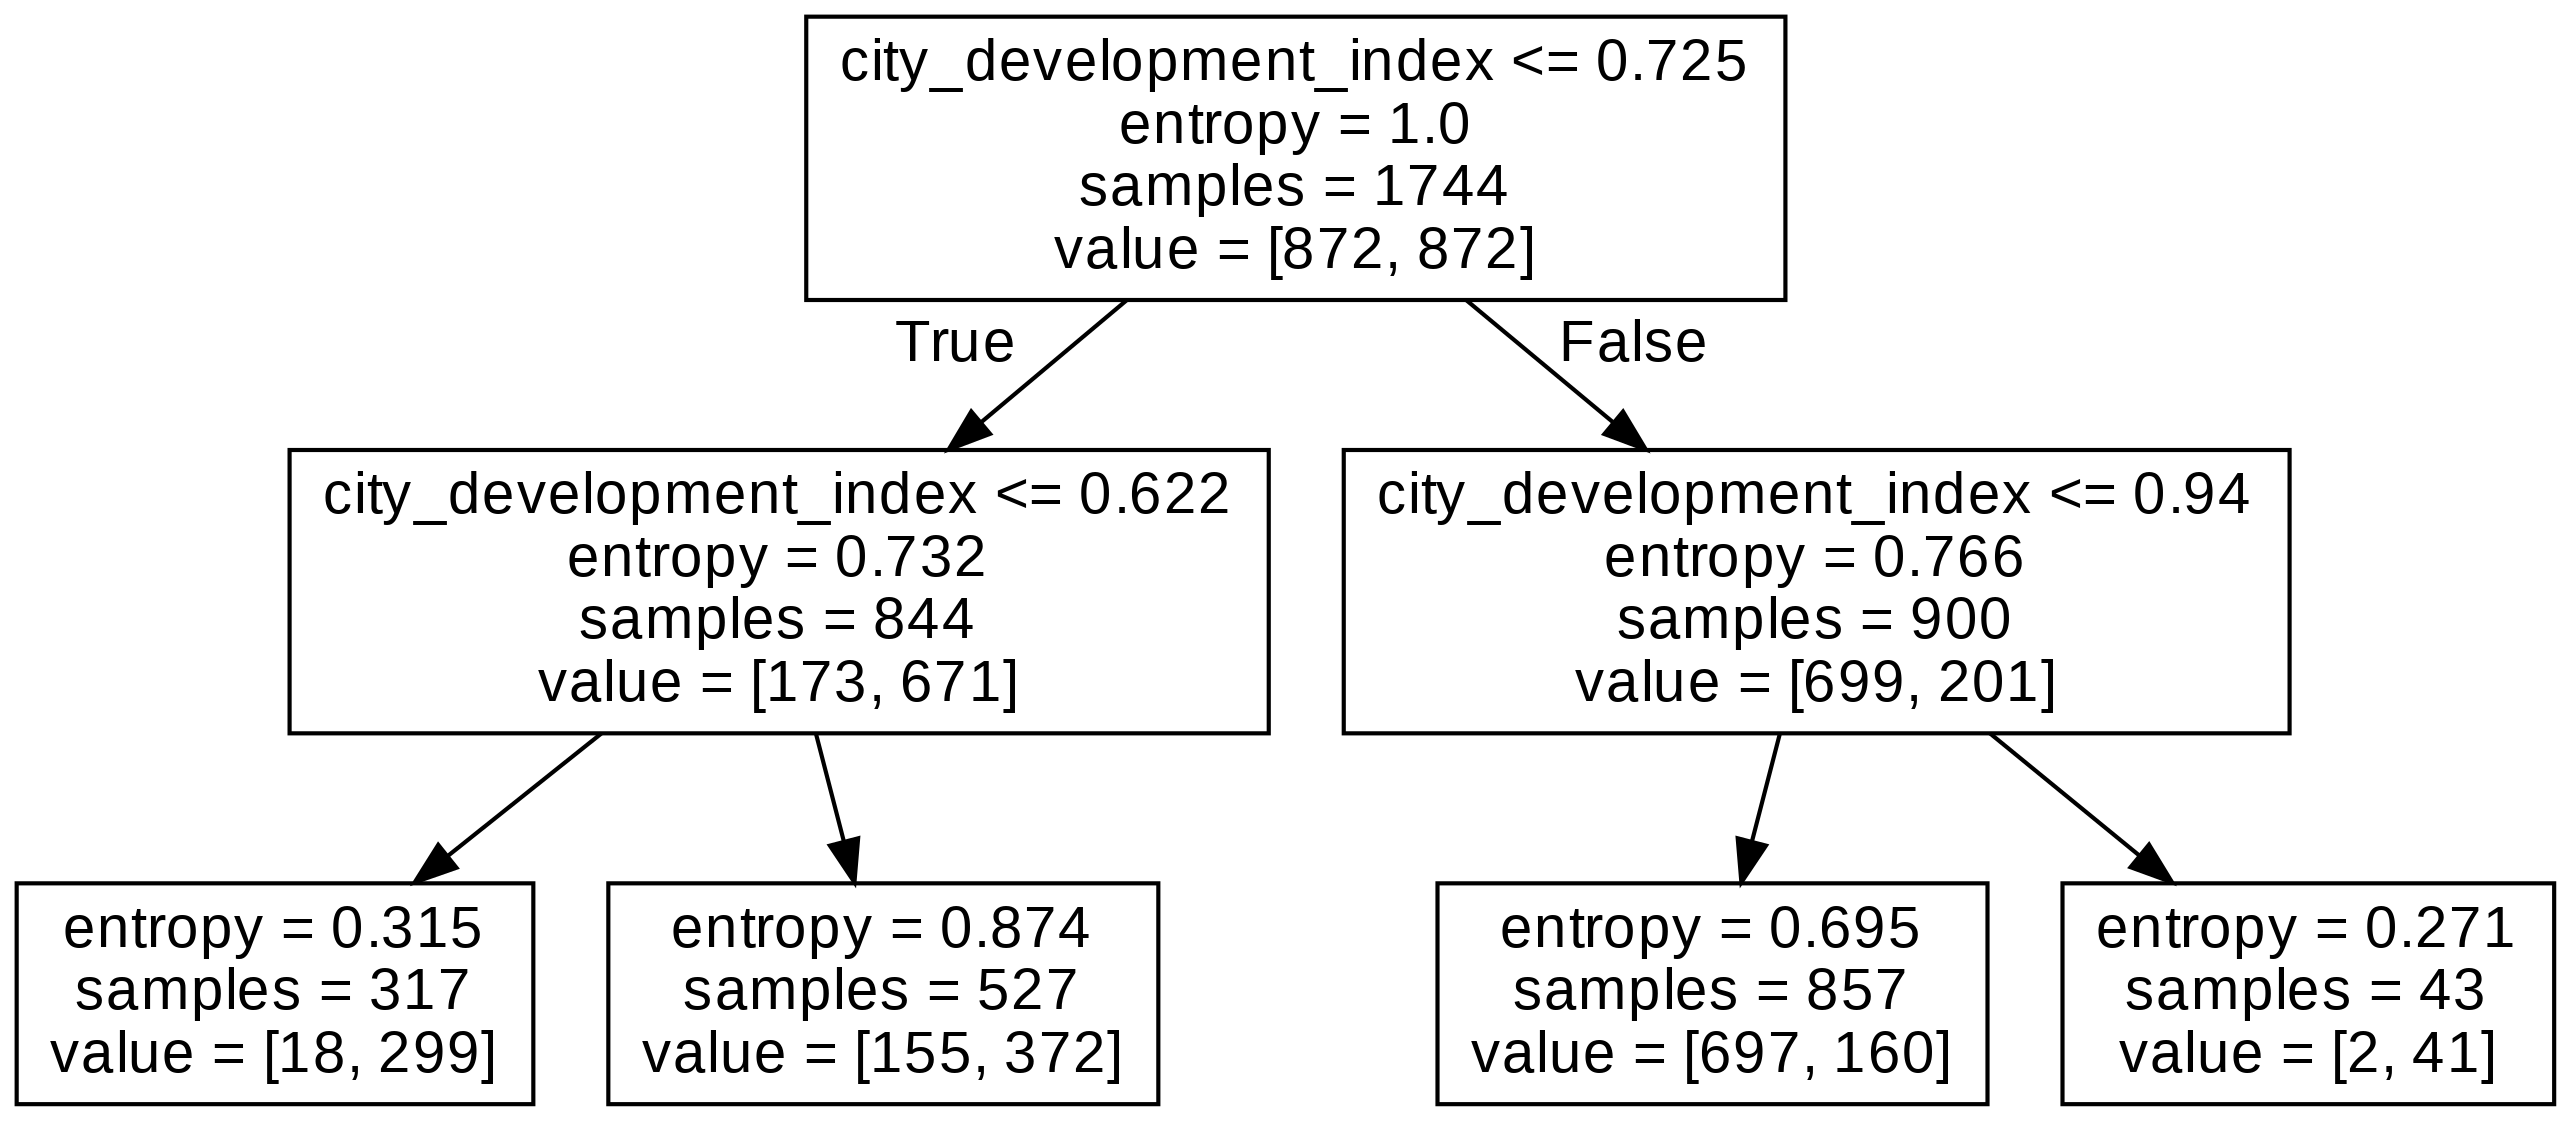

In [36]:
from IPython.display import Image
Image(filename = 'classification-tree-entropy.png')  

city_development_index                         1.0
training_hours                                 0.0
gender_Female                                  0.0
gender_Male                                    0.0
relevent_experience_Has relevent experience    0.0
dtype: float64


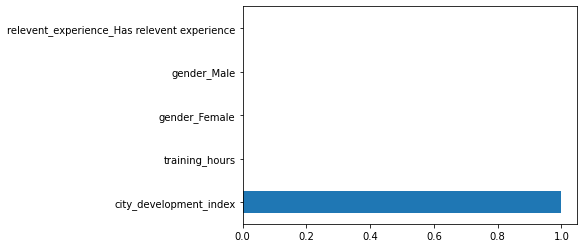

In [35]:
# Print the importance level of each feature
weights_entropy = model_fi_entropy.feature_importances_     # Feature importance scores.
cols = X.columns                                            # Corresponding names of important features.
feature_importances_entropy = pd.Series(weights_entropy, index=cols)     # Generate Series containing importance level
print(feature_importances_entropy.nlargest(5))

# Plot the five most important features 
feature_importances_entropy.nlargest(5).plot(kind="barh")

GINI

In [37]:
from sklearn.tree import DecisionTreeClassifier
model_fi_gini = DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_split=10)
model_fi_gini.fit(X_train_oversampling, y_train_oversampling)

DecisionTreeClassifier(max_depth=2, min_samples_split=10)

In [38]:
# Visualize the tree. Note: to run dot command, we have to install 'graphviz'
from sklearn import tree
tree.export_graphviz(decision_tree=model_fi_gini, out_file='classification-tree-gini.dot', feature_names=X.columns)     # Save model as 'classification-tree-gini.dot'
from subprocess import call
call(['dot', '-Tpng', 'classification-tree-gini.dot', '-o', 'classification-tree-gini.png', '-Gdpi=300']) 

0

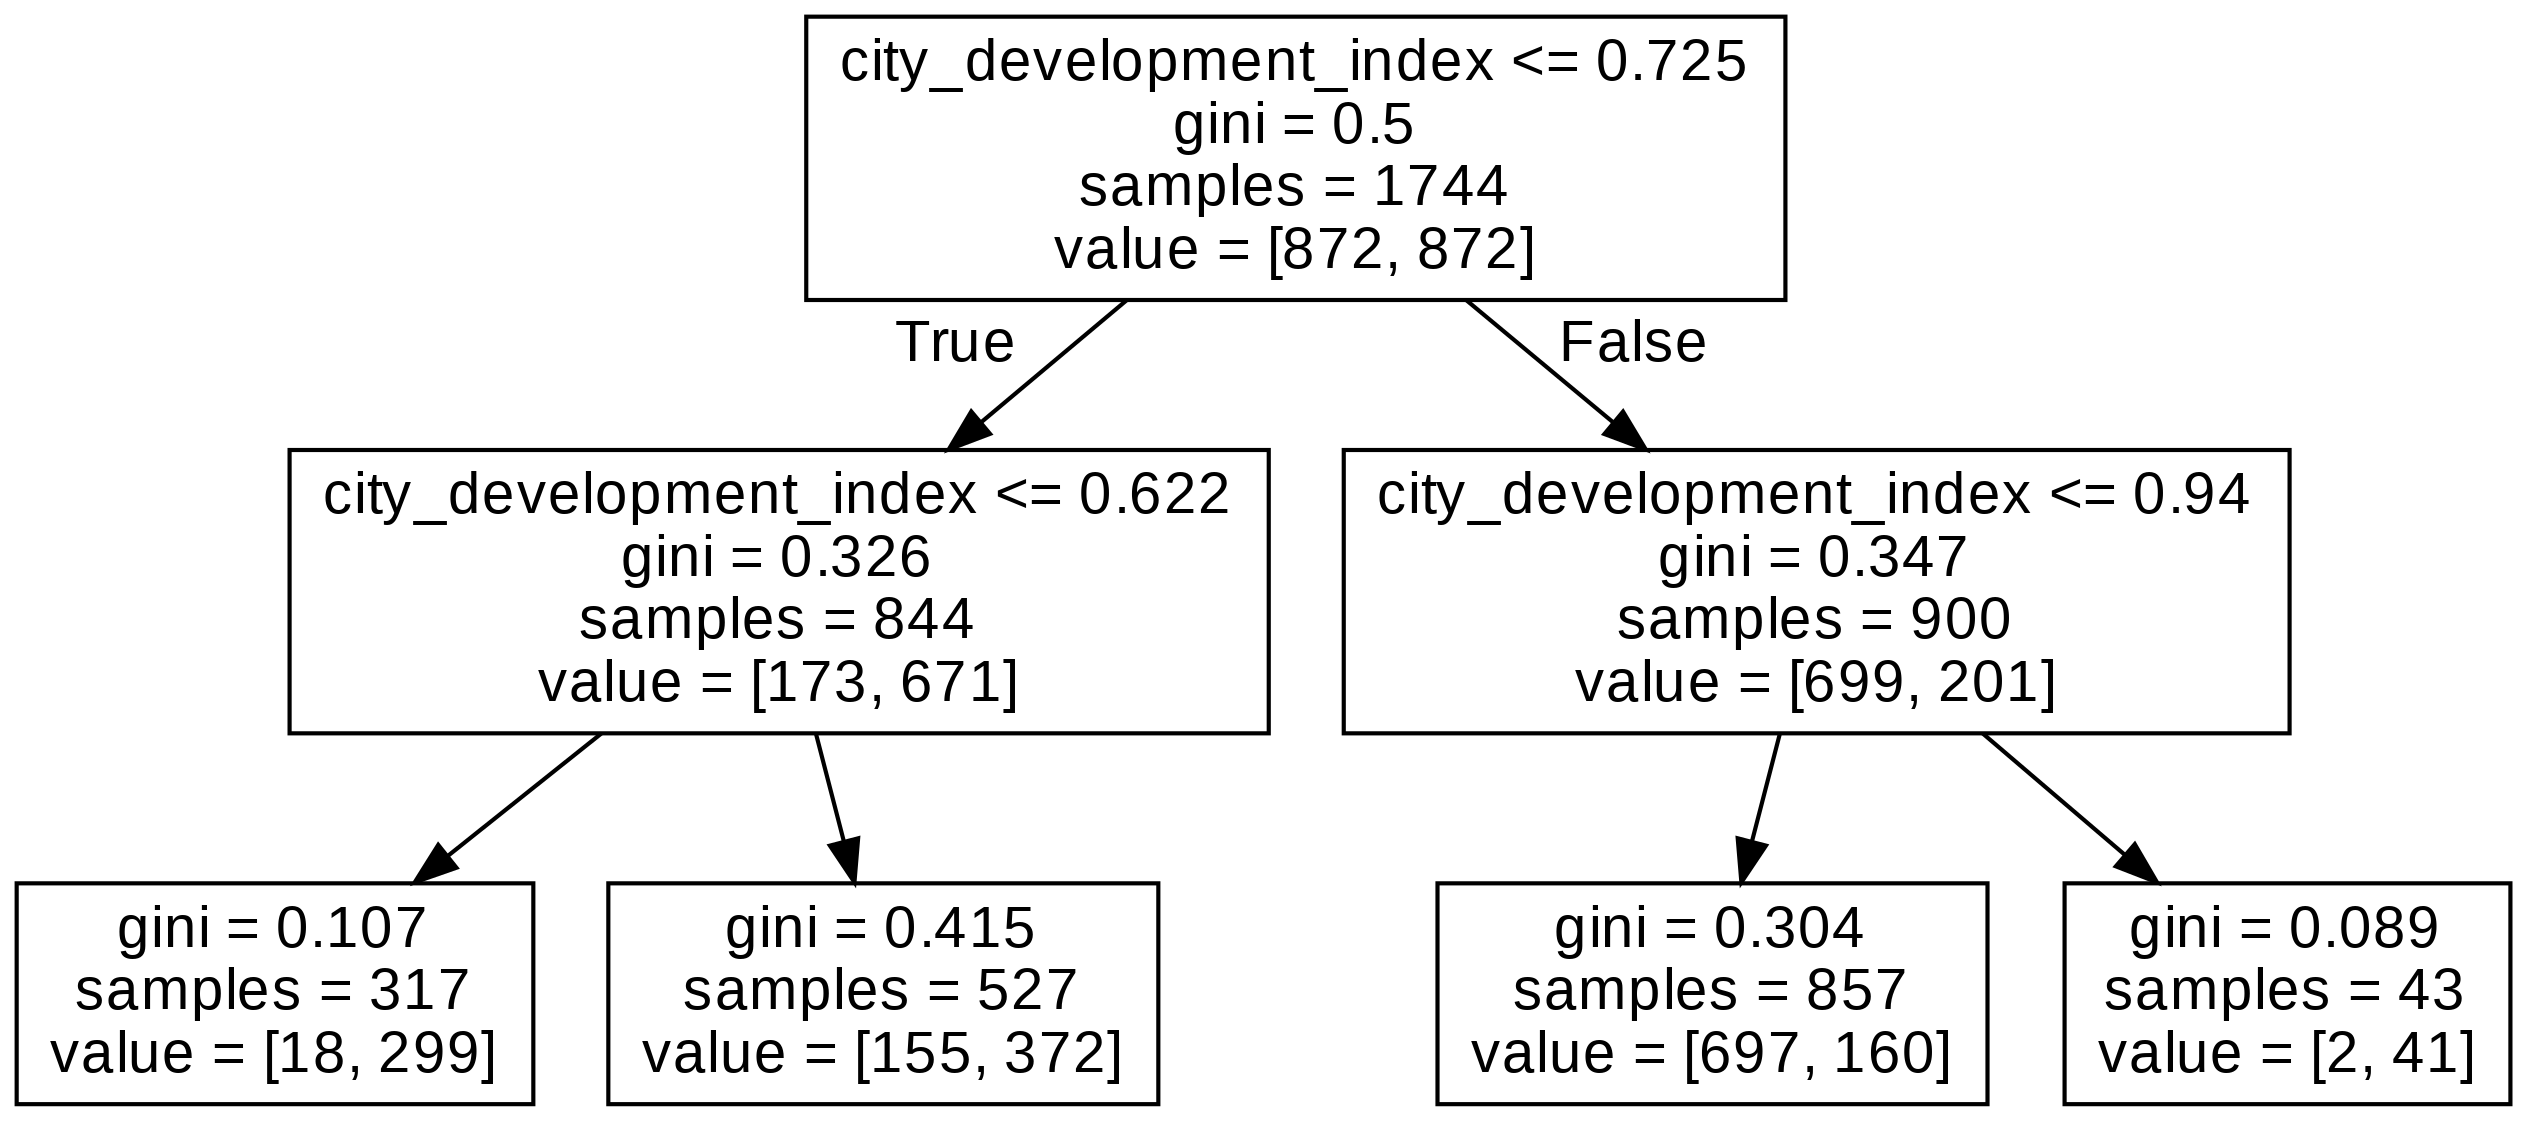

In [39]:
from IPython.display import Image
Image(filename = 'classification-tree-gini.png')     # Load and display file 'classification-tree-gini.png'

city_development_index                         1.0
training_hours                                 0.0
gender_Female                                  0.0
gender_Male                                    0.0
relevent_experience_Has relevent experience    0.0
relevent_experience_No relevent experience     0.0
enrolled_university_Full time course           0.0
enrolled_university_Part time course           0.0
education_level_Graduate                       0.0
education_level_Masters                        0.0
education_level_Phd                            0.0
major_discipline_Arts                          0.0
major_discipline_Business Degree               0.0
major_discipline_Humanities                    0.0
major_discipline_No Major                      0.0
major_discipline_Other                         0.0
major_discipline_STEM                          0.0
experience_1                                   0.0
experience_10                                  0.0
experience_11                  

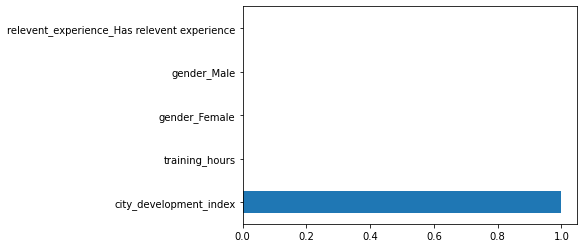

In [42]:
# Print the importance level of each feature
weights_gini = model_fi_gini.feature_importances_           # Feature importance scores.
cols = X.columns                                            # Corresponding names of important features.
feature_importances_gini = pd.Series(weights_gini, index=cols)   # Generate Series containing importance level
print(feature_importances_gini)

# Plot the five most important features 
feature_importances_gini.nlargest(5).plot(kind="barh")

RANDOM FOREST

In [21]:

from sklearn.ensemble import RandomForestClassifier

params = {"criterion": ["gini", "entropy"],             # Criterion to evaluate the purity.
         "max_depth": [7, 9, 11],                           # Maximum depth of the tree
         "min_samples_split": [8, 12, 16]}                   # Stop splitting condition.

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(n_estimators=10, n_jobs=10), param_grid=params, cv= 5) # Number of trees in the forest is 10

# Run the search on oversampled training data samples.
grid_search_rf.fit(X_train_oversampling, y_train_oversampling)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=10, n_jobs=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 9, 11],
                         'min_samples_split': [8, 12, 16]})

In [22]:
# Best set of hyper parameters of the Random Forest
grid_search_rf.best_params_

{'criterion': 'gini', 'max_depth': 11, 'min_samples_split': 8}

In [23]:
# Build a Random Forest model pipeline from the best set of hyper-parameters found
model_rf = RandomForestClassifier(n_estimators=10, random_state=1, criterion=grid_search_rf.best_params_['criterion'], max_depth=grid_search_rf.best_params_['max_depth'], min_samples_split=grid_search_rf.best_params_['min_samples_split'])     # Initialize the RandomForest

In [24]:
# Train the Random Forest model
model_rf.fit(X_train_oversampling, y_train_oversampling)

RandomForestClassifier(max_depth=11, min_samples_split=8, n_estimators=10,
                       random_state=1)

In [25]:
# Calculate some evaluation metrics: precision, recall, f1-score. 'Support' is the number of actual occurrences of the class in the dataset.
from sklearn.metrics import classification_report

# Make prediction on the original test set (after training on the over-sampled training set).
pred_y = model_rf.predict(X_test)

print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87       199
         1.0       0.90      0.87      0.88       228

    accuracy                           0.88       427
   macro avg       0.88      0.88      0.88       427
weighted avg       0.88      0.88      0.88       427

